In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
file_path2 = '1_data.pkl'
ecg_data = pd.read_pickle(file_path2)

In [135]:
ecg_data

{'I': array([-120.00523 ,  -42.99555 ,   35.009163, ...,  -63.99581 ,
         -57.00445 ,  -66.01205 ], dtype=float32),
 'II': array([ 24.990799,  97.00037 , 194.99448 , ..., -41.994846,  -6.993007,
        -21.991167], dtype=float32),
 'III': array([145.0031  , 139.99588 , 160.006   , ...,  21.998013,  49.99719 ,
         43.996025], dtype=float32),
 'AVR': array([  47.00971 ,  -26.99092 , -114.998436, ...,   53.000732,
          32.000835,   44.003757], dtype=float32),
 'AVL': array([-131.9904  ,  -90.99259 ,  -61.997704, ...,  -43.001774,
         -54.002712,  -55.004696], dtype=float32),
 'AVF': array([ 85.005264, 118.00192 , 177.99875 , ..., -10.001246,  21.003681,
         11.002436], dtype=float32),
 'V1': array([150.00429  , 186.99768  , 236.99213  , ...,  -5.0036325,
        -11.996156 , -14.005983 ], dtype=float32),
 'V2': array([  62.007805,  165.01033 ,  316.99542 , ..., -139.99132 ,
        -132.00346 ,  -47.99908 ], dtype=float32),
 'V3': array([  65.01162 ,  209.9951  ,

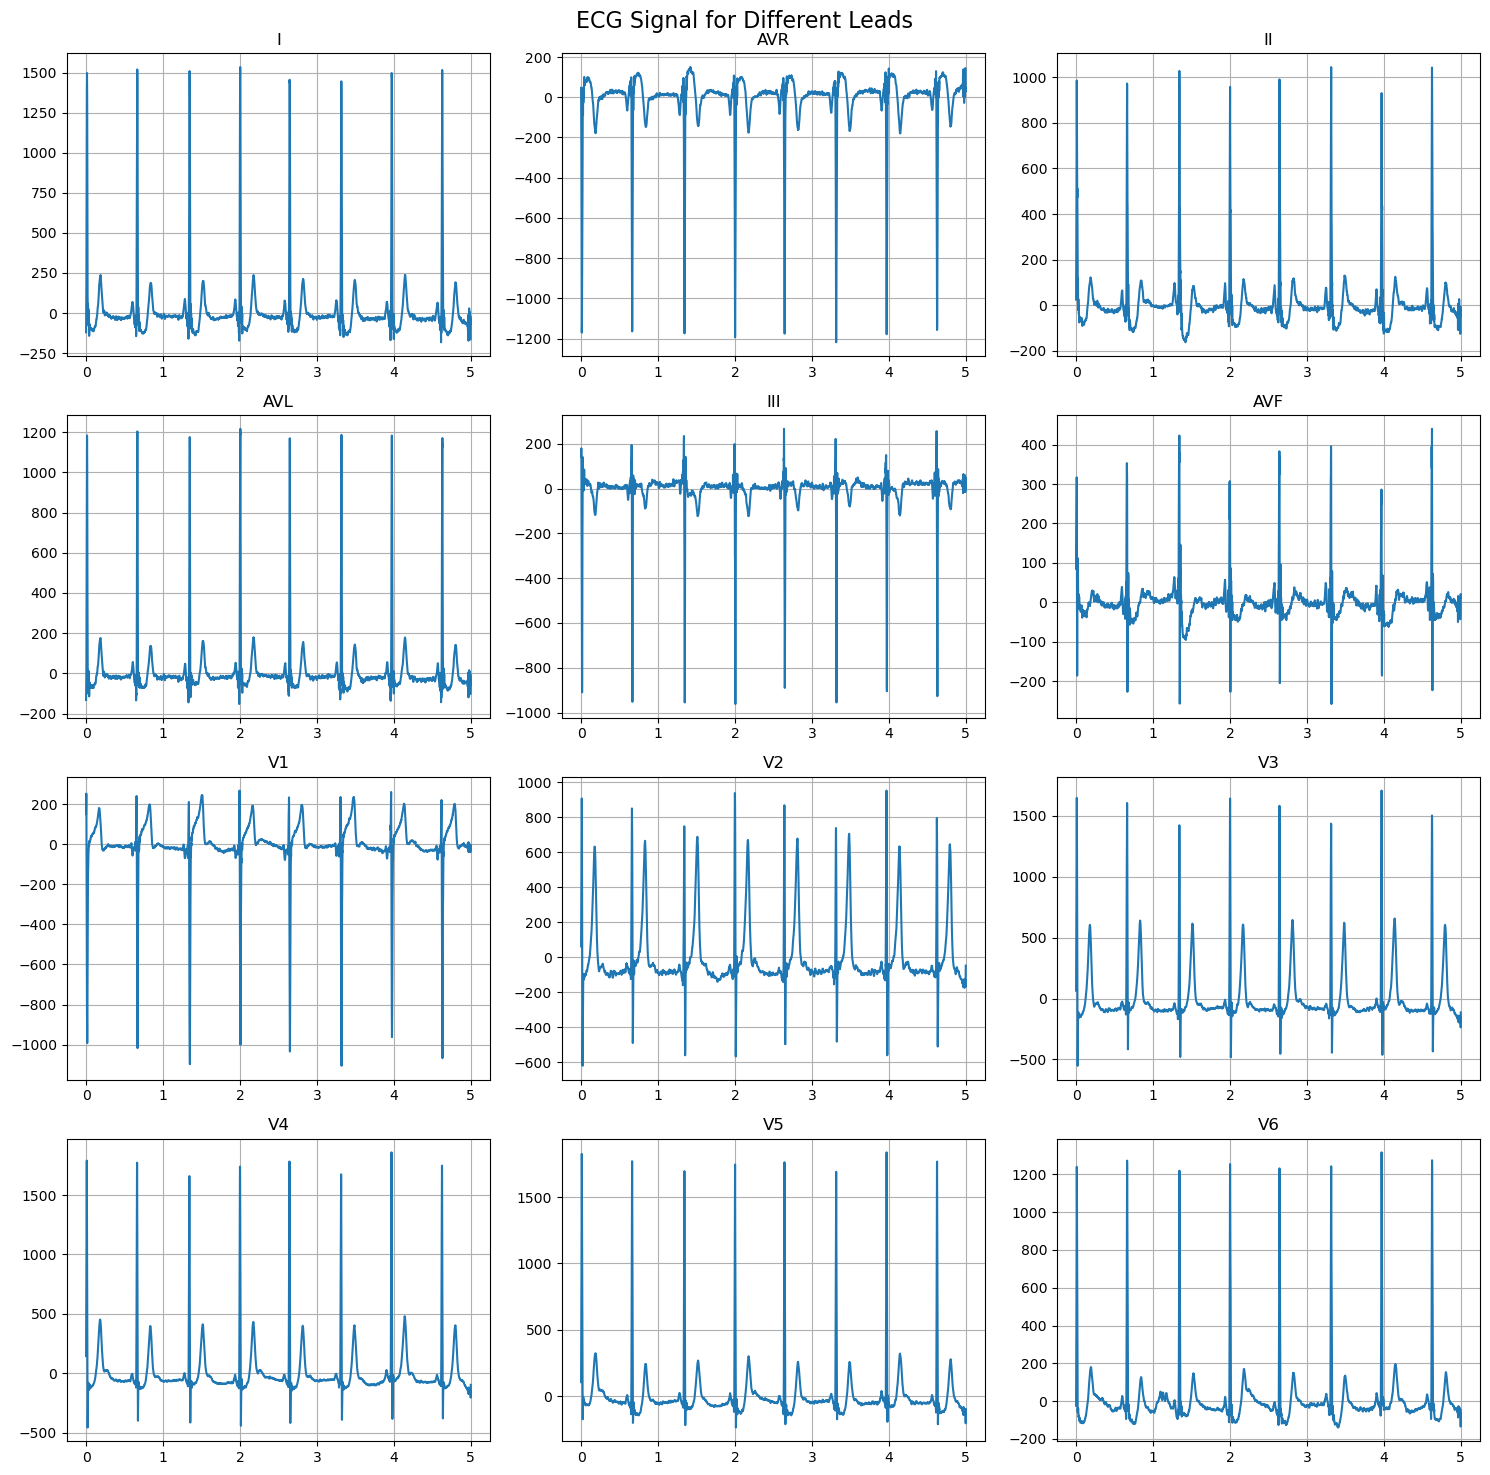

In [22]:
# 시간축 설정
time_axis = np.arange(len(ecg_data['I'])) / 1000.0  # 샘플링 주기에 따른 시간축 (1000 Hz로 가정)

# 리드 순서
lead_order = ['I', 'AVR', 'II', 'AVL', 'III', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6']

# 그래프로 표현
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(15, 15))
fig.suptitle('ECG Signal for Different Leads', fontsize=16)

for idx, lead in enumerate(lead_order):
    row = idx // 3
    col = idx % 3
    axes[row, col].plot(time_axis, ecg_data[lead])
    axes[row, col].set_title(lead)
    axes[row, col].grid(True)

plt.tight_layout()
plt.show()

In [45]:
import pickle

with open('1_data.pkl', 'rb') as f:
    ecg_data = pickle.load(f)

ecg_frame = pd.DataFrame(ecg_data)
ecg_frame

,I,II,III,AVR,AVL,AVF,V1,V2,V3,V4,V5,V6
0,-120.005234,24.990799,145.003098,47.009708,-131.990402,85.005264,150.004288,62.007805,65.011620,144.993637,105.006981,-24.989607
1,-42.995548,97.000366,139.995880,-26.990919,-90.992592,118.001923,186.997681,165.010330,209.995102,309.998596,235.015625,67.009499
2,35.009163,194.994476,160.005997,-114.998436,-61.997704,177.998749,236.992126,316.995422,401.996552,502.015259,386.987732,152.005280
3,101.990051,282.002197,179.997375,-192.005005,-38.993843,230.997894,252.003021,495.006989,636.982849,739.994324,580.006897,269.994476
4,208.012573,350.000000,142.002518,-278.989655,33.002819,246.005096,199.998749,527.006409,721.987427,845.000732,695.014526,356.991211
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,-35.009163,-40.007362,-5.007220,36.989876,-15.008872,-22.995411,-36.993382,-165.010330,-180.005646,-161.999710,-135.008972,-74.991051
4996,-47.001831,-44.994480,2.006639,46.007725,-25.007828,-22.004871,-27.007053,-169.999741,-177.006714,-154.999298,-130.008636,-70.010918
4997,-63.995811,-41.994846,21.998013,53.000732,-43.001774,-10.001246,-5.003633,-139.991318,-199.998627,-179.995758,-167.004776,-100.002892
4998,-57.004452,-6.993007,49.997189,32.000835,-54.002712,21.003681,-11.996156,-132.003464,-236.985611,-204.992218,-205.013626,-134.997238


In [46]:
print(ecg_data.keys())


dict_keys(['I', 'II', 'III', 'AVR', 'AVL', 'AVF', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6'])


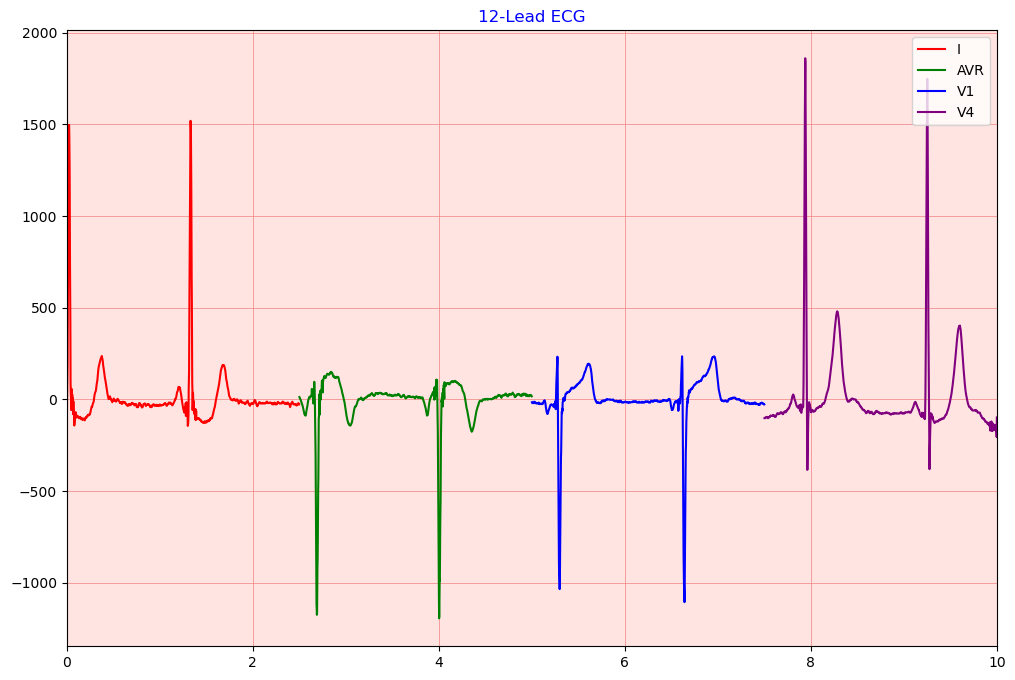

In [57]:
# 그래프 크기 조절
plt.figure(figsize=(12, 8))

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')
plt.grid(color='lightcoral', linestyle='-', linewidth=0.5)

# 리드 이름과 색상 설정
lead_names = ['I', 'AVR', 'V1', 'V4']
colors = ['red', 'green', 'blue', 'purple']

# 각 리드를 하나의 그래프로 이어서 그리기
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name]
    end_time = start_time + 2.5
    
    # 선 색상과 레이블 지정
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    
    # 4개의 리드마다 줄 바꾸기
    if (i + 1) % 4 == 0:
        plt.title('12-Lead ECG', color='blue')
        plt.legend(loc='upper right')  # 리드 이름 표시
        plt.xlim(0, 10)  # x 축 범위 지정
        start_time = 0  # 다음 줄로 넘어갈 때 시작 시간 초기화
        plt.show()  # 현재까지 그린 그래프 보여주기
    else:
        start_time = end_time  # 다음 리드의 시작 시간으로 갱신


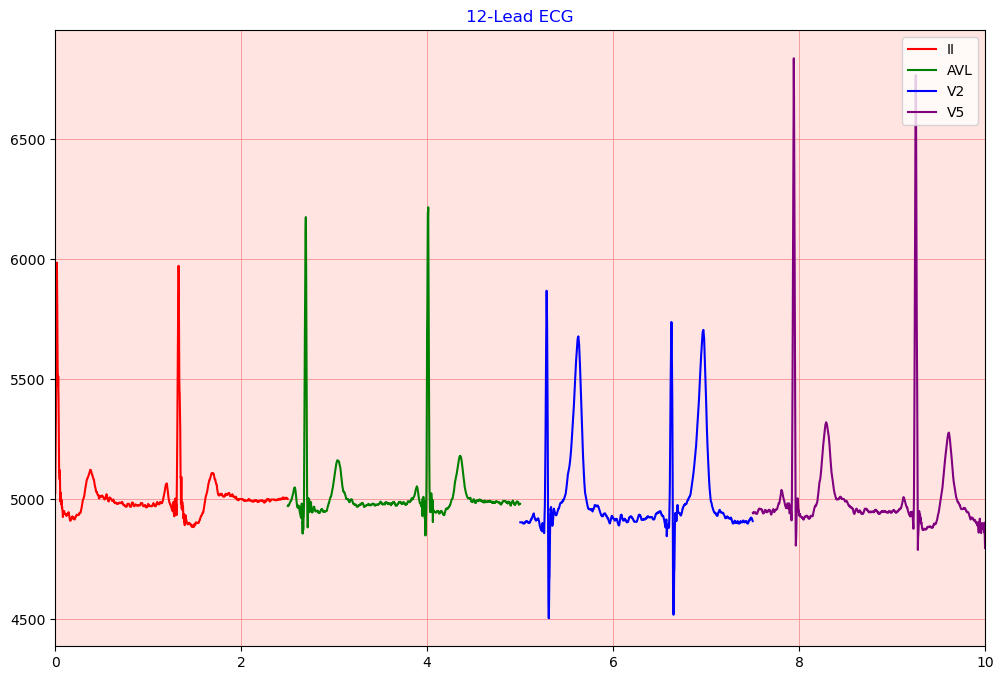

In [136]:
# 그래프 크기 조절
plt.figure(figsize=(12, 8))

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')
plt.grid(color='lightcoral', linestyle='-', linewidth=0.5)

# 리드 이름과 색상 설정
lead_names = ['II', 'AVL', 'V2', 'V5']
colors = ['red', 'green', 'blue', 'purple']

# 각 리드를 하나의 그래프로 이어서 그리기
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name] + 5000
    end_time = start_time + 2.5
    
    # 선 색상과 레이블 지정
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    
    # 4개의 리드마다 줄 바꾸기
    if (i + 1) % 4 == 0:
        plt.title('12-Lead ECG', color='blue')
        plt.legend(loc='upper right')  # 리드 이름 표시
        plt.xlim(0, 10)  # x 축 범위 지정
        start_time = 0  # 다음 줄로 넘어갈 때 시작 시간 초기화
        plt.show()  # 현재까지 그린 그래프 보여주기
    else:
        start_time = end_time  # 다음 리드의 시작 시간으로 갱신


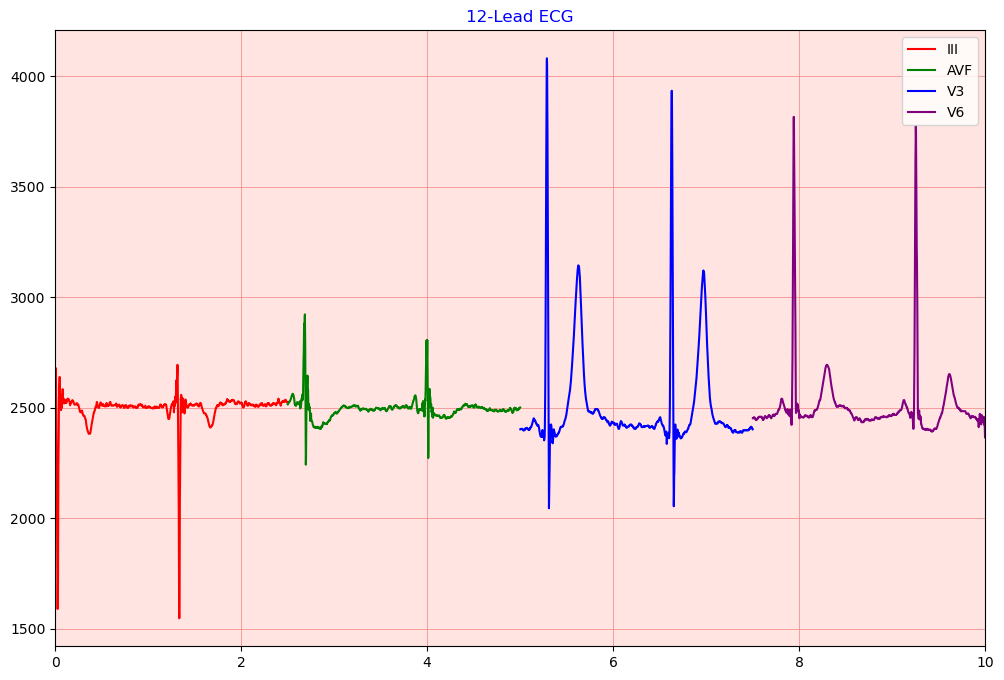

In [73]:
# 그래프 크기 조절
plt.figure(figsize=(12, 8))

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')
plt.grid(color='lightcoral', linestyle='-', linewidth=0.5)

# 리드 이름과 색상 설정
lead_names = ['III', 'AVF', 'V3', 'V6']
colors = ['red', 'green', 'blue', 'purple']

# 각 리드를 하나의 그래프로 이어서 그리기
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name] + 2500  # y축 값에 2500을 더하기
    end_time = start_time + 2.5
    
    # 선 색상과 레이블 지정
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    
    # 4개의 리드마다 줄 바꾸기
    if (i + 1) % 4 == 0:
        plt.title('12-Lead ECG', color='blue')
        plt.legend(loc='upper right')  # 리드 이름 표시
        plt.xlim(0, 10)  # x 축 범위 지정
        start_time = 0  # 다음 줄로 넘어갈 때 시작 시간 초기화
        plt.show()  # 현재까지 그린 그래프 보여주기
    else:
        start_time = end_time  # 다음 리드의 시작 시간으로 갱신

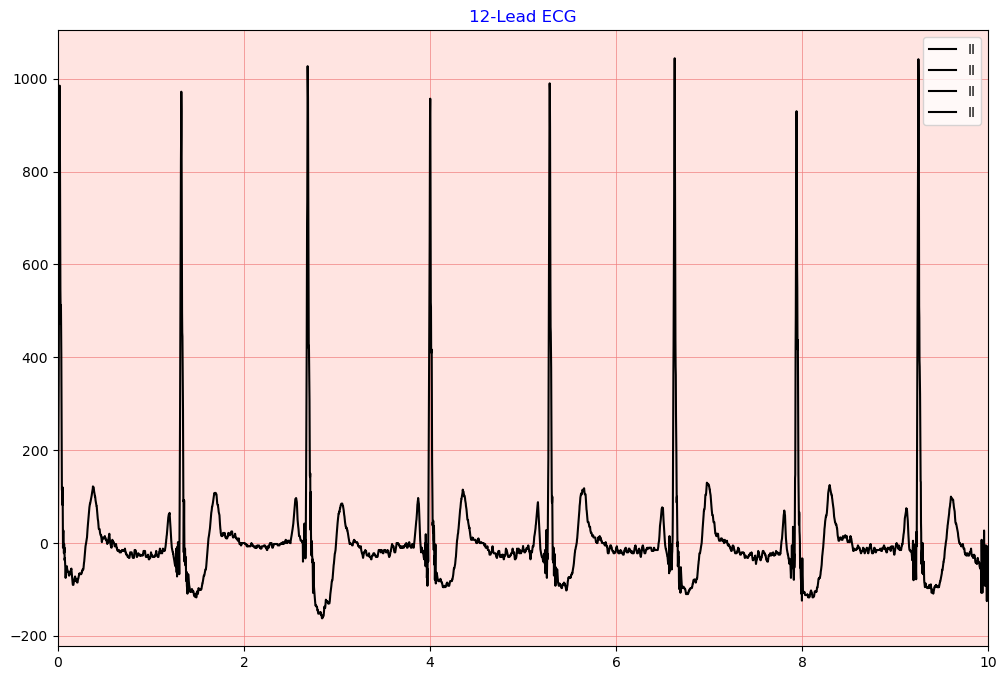

In [63]:
# 그래프 크기 조절
plt.figure(figsize=(12, 8))

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')
plt.grid(color='lightcoral', linestyle='-', linewidth=0.5)

# 리드 이름과 색상 설정
lead_names = ['II','II','II','II']
colors = ['black','black','black','black']

# 각 리드를 하나의 그래프로 이어서 그리기
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name]
    end_time = start_time + 2.5
    
    # 선 색상과 레이블 지정
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    
    # 4개의 리드마다 줄 바꾸기
    if (i + 1) % 4 == 0:
        plt.title('12-Lead ECG', color='blue')
        plt.legend(loc='upper right')  # 리드 이름 표시
        plt.xlim(0, 10)  # x 축 범위 지정
        start_time = 0  # 다음 줄로 넘어갈 때 시작 시간 초기화
        plt.show()  # 현재까지 그린 그래프 보여주기
    else:
        start_time = end_time  # 다음 리드의 시작 시간으로 갱신


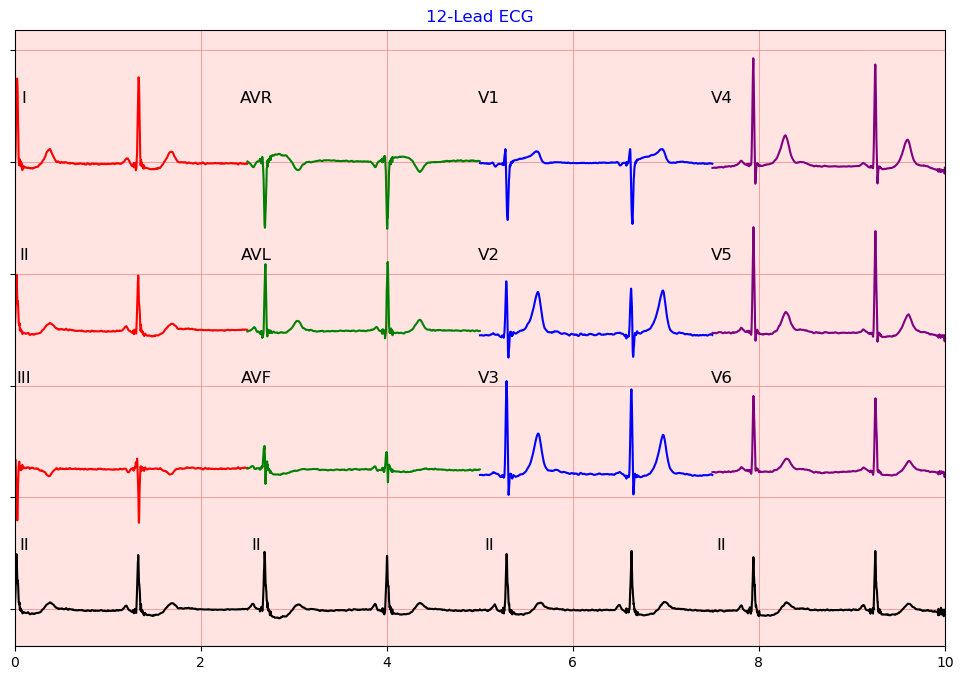

In [134]:
import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

with open('1_data.pkl', 'rb') as f:
    ecg_data = pickle.load(f)

# 그래프 크기 조절
plt.figure(figsize=(12,8))

# 바탕색과 grid 추가
plt.gca().set_facecolor('mistyrose')
plt.grid(color='lightcoral', linestyle='-', linewidth=0.5)

# 리드 이름과 색상 설정
lead_names = ['I', 'AVR', 'V1', 'V4']
colors = ['red', 'green', 'blue', 'purple']
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name] + 8000
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 9000, lead_name, fontsize=12, color=colors_2[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time  # 다음 리드의 시작 시간으로 갱신
        

# 리드 이름과 색상 설정
lead_names = ['II', 'AVL', 'V2', 'V5']
colors = ['red', 'green', 'blue', 'purple']
start_time = 0
for i, lead_name in enumerate(lead_names):
    lead_data = ecg_data[lead_name] + 5000
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 6200, lead_name, fontsize=12, color=colors_2[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time  # 다음 리드의 시작 시간으로 갱신   


# 첫 번째 그래프 그리기
lead_names_1 = ['III', 'AVF', 'V3', 'V6']
colors_1 = ['red', 'green', 'blue', 'purple']
start_time = 0
for i, lead_name in enumerate(lead_names_1):
    lead_data = ecg_data[lead_name] + 2500  # y축 값에 2500을 더하기
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors_1[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 4000, lead_name, fontsize=12, color=colors_2[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time

# 두 번째 그래프 그리기
lead_names_2 = ['II', 'II', 'II', 'II']
colors_2 = ['black', 'black', 'black', 'black']
start_time = 0
for i, lead_name in enumerate(lead_names_2):
    lead_data = ecg_data[lead_name]
    end_time = start_time + 2.5
    color_idx = i % 4
    plt.plot(time_data[(time_data >= start_time) & (time_data <= end_time)], lead_data[(time_data >= start_time) & (time_data <= end_time)], color=colors_2[color_idx], label=lead_name)
    plt.text(start_time + 0.1, 1000, lead_name, fontsize=12, color=colors_2[color_idx], ha='center', va='bottom')  # lead_name 표시 (고정된 y값인 4000 사용)
    start_time = end_time

plt.title('12-Lead ECG', color='blue')
plt.gca().set_yticklabels([])
plt.xlim(0, 10)  # x 축 범위 지정

file_path = '1_data.png'
plt.savefig(file_path, dpi=300, bbox_inches='tight')

plt.show()  # 그래프 보여주기


In [ ]:
file_path = '1_data.png'
plt.savefig(file_path, dpi=300, bbox_inches='tight')
